In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


      blanco     gemeente               lijst  zetels
0     1797.0        Aalst                sp.a     3.0
1     1797.0        Aalst                N-VA    16.0
2     1797.0        Aalst                CD&V     6.0
3     1797.0        Aalst               Groen     4.0
4     1797.0        Aalst       VLAAMS BELANG     8.0
5     1797.0        Aalst            Open Vld     4.0
6     1797.0        Aalst              lijstA     2.0
7     1797.0        Aalst                PVDA     0.0
8      797.0       Aalter         sp.a & meer     0.0
9      797.0       Aalter           CD&V/N-VA    20.0
10     797.0       Aalter               Groen     6.0
11     797.0       Aalter       VLAAMS BELANG     1.0
12     797.0       Aalter       Open Vld Plus     2.0
13     858.0     Aarschot                sp.a     4.0
14     858.0     Aarschot                N-VA     3.0
15     858.0     Aarschot                CD&V     7.0
16     858.0     Aarschot               Groen     3.0
17     858.0     Aarschot   

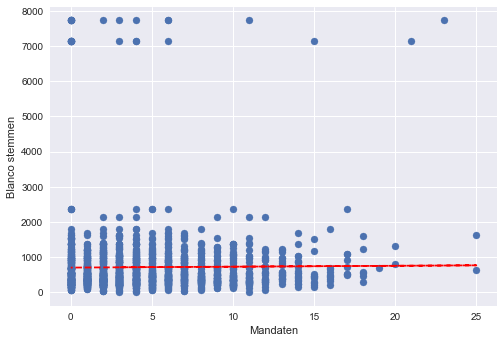

In [3]:
#%matplotlib inline
# module importeren om request te doen
import urllib.request

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm
from scipy.stats.stats import pearsonr

import pandas as pd
import json

plt.style.use('seaborn')

Mandaten = list()
Blanco = list()
kieskring = list()
kieskring.append({"gemeente":"dsfdfsd", "partij":"sdfdsfsf"})



# variabele om requested data in te plaatsen
kieskringdata = urllib.request.urlopen(
    "http://www.rocre.be/verkiezingen/json.php?fields=blanco_ongeldig,kieskring,lijst,zetels&duplicates=false").read()

# De data die we terugkeren gaan laden in JSON formaat
data = json.loads(kieskringdata)

# Omdat de json data in een wrapper van results zit dit gaan vervangen zodat de code op volgende lijnen korter is.
data = data["results"]


def search(gemeente, lijst):
       for d in kieskring:
            if(gemeente in d.values() and lijst in d.values()):
                return True
            else:
                found = False
       return found


for x in data:
    if(search(x["kieskring"], x["lijst"]) == False):
        thisdict = {
        "gemeente": x["kieskring"],
        "zetels" : float(x["zetels"]),
        "lijst" : x["lijst"],
        "blanco" : float(x["blanco_ongeldig"])
        }
        kieskring.append(thisdict)

kieskring.pop(0)

dataframe = pd.DataFrame(kieskring)
print(dataframe)
#newlist = sorted(kieskring, key=lambda k: k['mandaten']) 

#print(len(newlist))

for p in kieskring:
    #if(float(p["mandaten"]) < 49 or float(p["blanco"]) < 2000):
        Mandaten.append(p["zetels"])
        Blanco.append(p["blanco"])

print(pearsonr(Mandaten, Blanco))
print(len(Mandaten))
plt.scatter(Mandaten, Blanco)

z = np.polyfit(Mandaten, Blanco, 1)
p = np.poly1d(z)
plt.plot(Mandaten,p(Mandaten),"r--")

plt.xlabel("Mandaten")
plt.ylabel("Blanco stemmen")


plt.show()

#Er is geen verband 

